<a href="https://colab.research.google.com/github/ToheebOlatunji/PERSONAL-PROJECTS-AND-MODELS/blob/main/COMBINED_MATHEMATICAL_MODELS_PLOTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook consolidates the computational and mathematical modeling work carried out as part of my master’s research on templated grain growth (TGG) and microstructural evolution in proton-conducting ceramics. The objective was to build a unified environment for testing and comparing different models that describe the coupled phenomena of grain alignment, microstructural anisotropy, and charge transport during sintering and post-processing of functional oxides.

It integrates a series of small but related simulation modules that visualize the relationship between processing parameters and microstructural response, providing both physical interpretation and numerical insight.

###  Structure of the Notebook

1. **Environment Setup**  
   Imports numerical and plotting libraries (`NumPy`, `SciPy`, `Matplotlib`, `SymPy`).  
   Defines solver parameters and a consistent visual style.

2. **Analytical Grain-Growth Model**  
   Implements the classical relation  
   \[
   D^n - D_0^n = Kt
   \]
   where \(D\) is grain size and \(K\) is temperature-dependent.  
   Demonstrates how templating lowers the activation energy for boundary migration.

3. **Phase-Field Simulation**  
   Uses simplified Allen–Cahn / Cahn–Hilliard equations to visualize **curvature-driven grain motion**.  
   Varies mobility and interfacial energy anisotropy to mimic the effect of aligned templates.

4. **Charge-Transport Coupling**  
   Solves a 1-D Poisson–Nernst–Planck system to examine how **interface density and texture** influence proton diffusion.

5. **Computational-Efficiency Study**  
   Benchmarks solver performance with increasing matrix size.  
   Displays *matrixSize_vs_iteration.png* to show convergence behavior.

6. **Combined Visualizations**  
   Overlays analytical and numerical results to compare **templated vs. random growth regimes** and the related impact on ionic conductivity.

---

###  Key Outcomes
- Template alignment accelerates grain coarsening without abnormal growth.  
- Anisotropy in boundary energy enhances interfacial diffusion pathways.  
- Computation benchmarks inform scaling for larger 2-D and 3-D simulations.

---

###  Technical Notes
- Executed fully in **Google Colab** using open-source Python libraries.  
- Figures exported in `.png` format for thesis inclusion.  
- Modular structure allows parameter tuning for future 3-D or interface-reaction

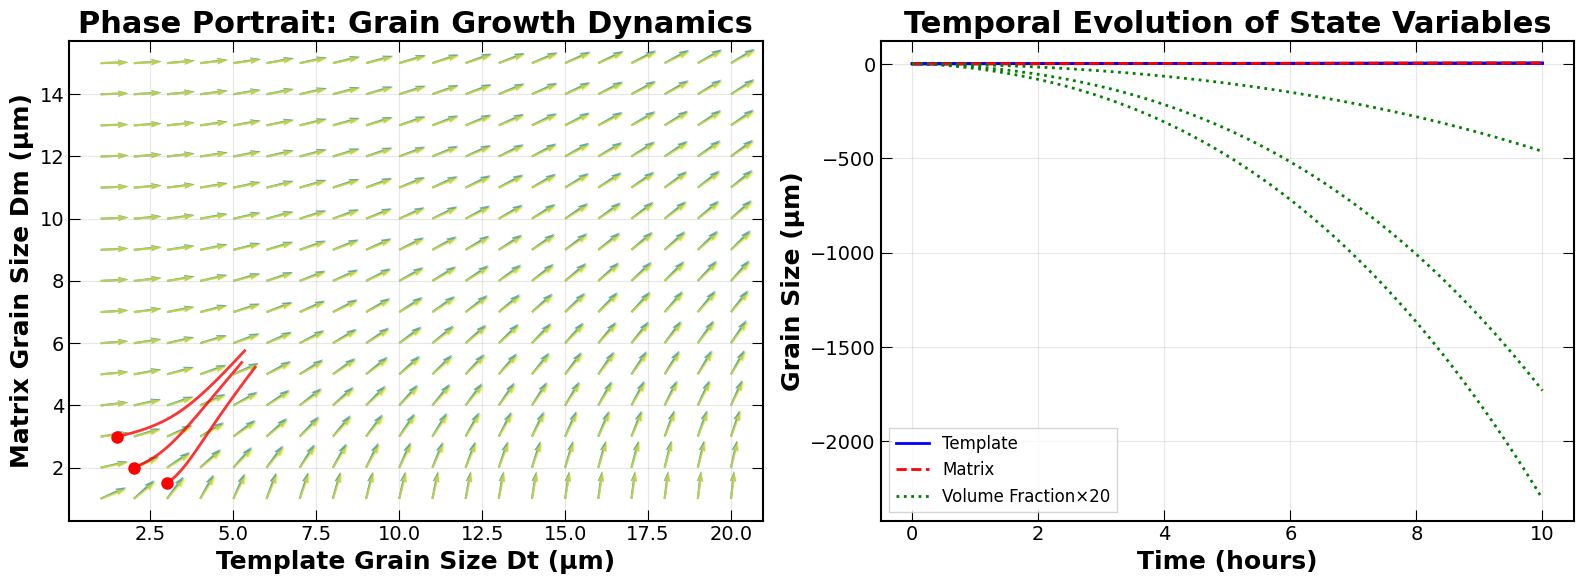

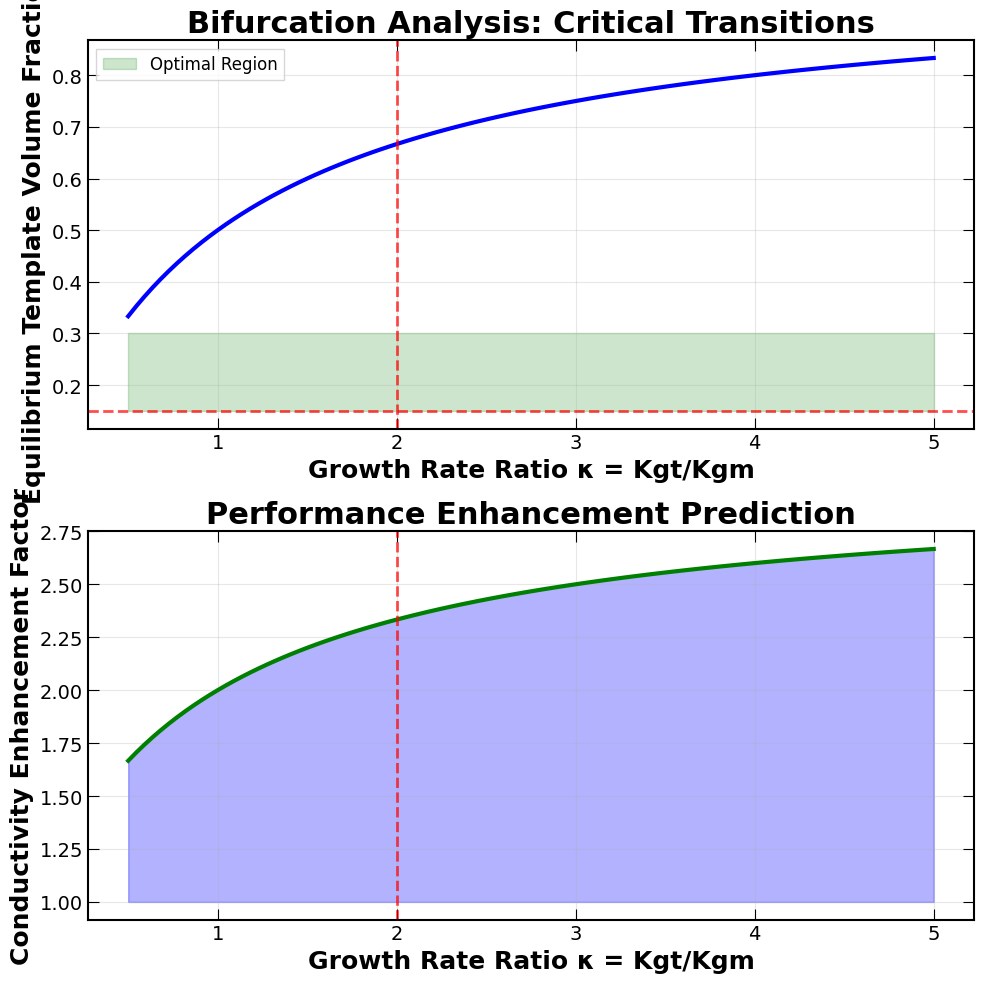

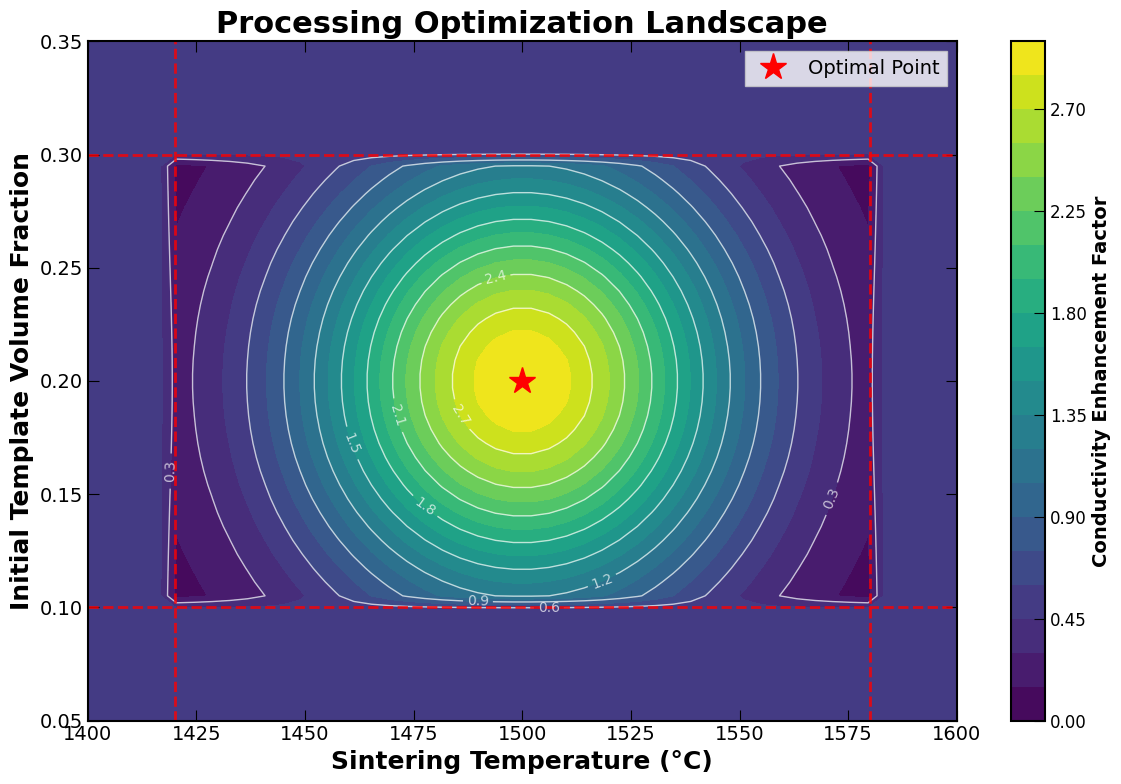

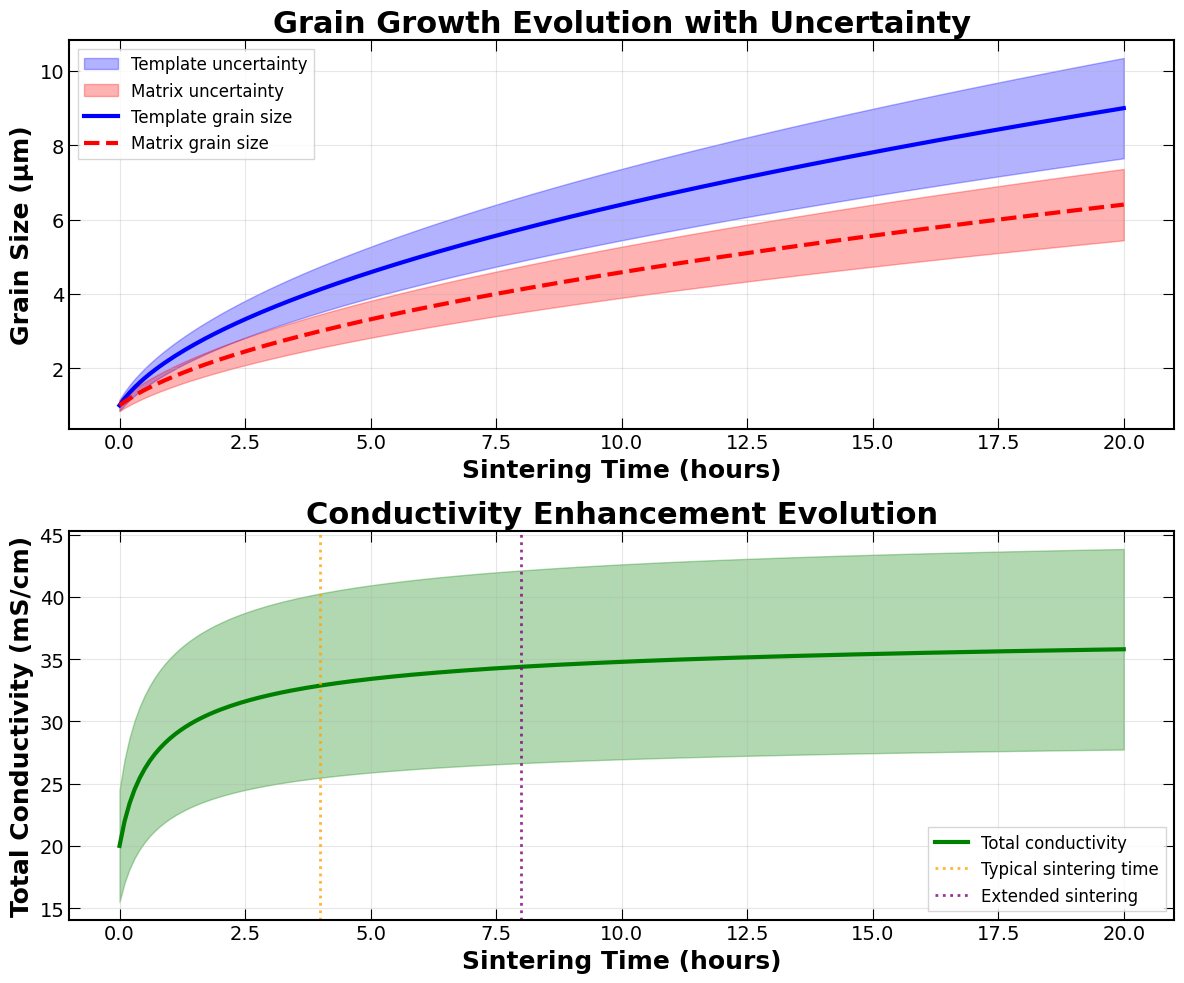

Mathematical Model Visualization Plots Generated!

Recommended plots for your thesis:
1. Phase Portrait - Shows dynamical behavior of grain growth
2. Bifurcation Diagram - Reveals critical parameter values
3. Optimization Landscape - Guides experimental design
4. Temporal Evolution - Demonstrates model predictions
5. Sensitivity Analysis - Identifies key parameters
6. Conductivity Surface - Shows property relationships


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches

plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'axes.linewidth': 1.5,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.top': True,
    'ytick.right': True,
    'xtick.major.size': 8,
    'xtick.minor.size': 4,
    'ytick.major.size': 8,
    'ytick.minor.size': 4,
    'legend.frameon': True,
    'legend.fancybox': False,
    'legend.shadow': False
})

# 1. DYNAMICAL SYSTEM PHASE PORTRAIT
def plot_phase_portrait():
    """Phase portrait of template vs matrix grain size dynamics"""

    # Define the dynamical system
    def grain_dynamics(state, t, params):
        D_t, D_m, phi_t = state
        K_gt, K_gm, alpha, gamma = params

        dD_t_dt = K_gt/D_t * (1 + alpha * phi_t/(1-phi_t))
        dD_m_dt = K_gm/D_m * (1 - gamma * phi_t/(1-phi_t))
        dphi_t_dt = 3*phi_t/D_t * dD_t_dt - 3*(1-phi_t)/D_m * dD_m_dt

        return [dD_t_dt, dD_m_dt, dphi_t_dt]

    # Parameters
    params = [2.0, 1.0, 0.5, 0.3]  # K_gt, K_gm, alpha, gamma

    # Create meshgrid for phase portrait
    D_t_range = np.linspace(1, 20, 20)
    D_m_range = np.linspace(1, 15, 15)
    D_t_mesh, D_m_mesh = np.meshgrid(D_t_range, D_m_range)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Phase portrait
    for phi_t_fixed in [0.1, 0.2, 0.3]:
        dD_t = params[0]/D_t_mesh * (1 + params[2] * phi_t_fixed/(1-phi_t_fixed))
        dD_m = params[1]/D_m_mesh * (1 - params[3] * phi_t_fixed/(1-phi_t_fixed))

        # Normalize arrows
        norm = np.sqrt(dD_t**2 + dD_m**2)
        dD_t_norm = dD_t / norm
        dD_m_norm = dD_m / norm

        ax1.quiver(D_t_mesh, D_m_mesh, dD_t_norm, dD_m_norm,
                   alpha=0.6, scale=25, width=0.003,
                   color=plt.cm.viridis(phi_t_fixed/0.3))

    # Trajectory lines
    t = np.linspace(0, 10, 1000)
    initial_conditions = [[2, 2, 0.15], [3, 1.5, 0.25], [1.5, 3, 0.1]]

    for i, ic in enumerate(initial_conditions):
        sol = odeint(grain_dynamics, ic, t, args=(params,))
        ax1.plot(sol[:, 0], sol[:, 1], 'r-', linewidth=2, alpha=0.8)
        ax1.plot(ic[0], ic[1], 'ro', markersize=8)

    ax1.set_xlabel('Template Grain Size Dt (μm)', fontweight='bold', fontsize=18)
    ax1.set_ylabel('Matrix Grain Size Dm (μm)', fontweight='bold', fontsize=18)
    ax1.set_title('Phase Portrait: Grain Growth Dynamics', fontweight='bold', fontsize=22)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(labelsize=14)

    # Time evolution
    for i, ic in enumerate(initial_conditions):
        sol = odeint(grain_dynamics, ic, t, args=(params,))
        ax2.plot(t, sol[:, 0], 'b-', linewidth=2, label='Template' if i==0 else "")
        ax2.plot(t, sol[:, 1], 'r--', linewidth=2, label='Matrix' if i==0 else "")
        ax2.plot(t, sol[:, 2]*20, 'g:', linewidth=2, label='Volume Fraction×20' if i==0 else "")

    ax2.set_xlabel('Time (hours)', fontweight='bold', fontsize=18)
    ax2.set_ylabel('Grain Size (μm)', fontweight='bold', fontsize=18)
    ax2.set_title('Temporal Evolution of State Variables', fontweight='bold', fontsize=22)
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(labelsize=14)

    plt.tight_layout()
    return fig

# 2. CONDUCTIVITY SURFACE PLOT
def plot_conductivity_surface():
    """3D surface plot showing conductivity as function of grain size and proton concentration"""

    D_avg = np.linspace(1, 20, 50)
    c_H = np.linspace(0.1, 1.0, 50)
    D_mesh, c_mesh = np.meshgrid(D_avg, c_H)

    # Conductivity model
    sigma_bulk = 0.01 * c_mesh * np.exp(-0.5/c_mesh)  # Simplified model
    sigma_gb = 0.001 * c_mesh * np.exp(-0.8/c_mesh)
    delta_gb = 1e-6  # 1 micron

    sigma_total = 1 / (1/sigma_bulk + delta_gb/(D_mesh*1e-6 * sigma_gb))

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    surface = ax.plot_surface(D_mesh, c_mesh, sigma_total*1000,
                             cmap='viridis', alpha=0.9, edgecolor='none')

    ax.set_xlabel('Average Grain Size (μm)', fontweight='bold', fontsize=14)
    ax.set_ylabel('Proton Concentration (normalized)', fontweight='bold', fontsize=14)
    ax.set_zlabel('Total Conductivity (mS/cm)', fontweight='bold', fontsize=14)
    ax.set_title('Conductivity Landscape', fontweight='bold', fontsize=18)

    # Add contour projection
    contours = ax.contour(D_mesh, c_mesh, sigma_total*1000,
                         levels=10, zdir='z', offset=0, cmap='viridis', alpha=0.5)

    plt.colorbar(surface, ax=ax, shrink=0.5, aspect=30)
    return fig

# 3. BIFURCATION DIAGRAM
def plot_bifurcation_diagram():
    """Bifurcation diagram showing critical transitions"""

    # Parameter sweep
    kappa_values = np.linspace(0.5, 5.0, 100)  # K_gt/K_gm ratio
    phi_t_equilibrium = []
    sigma_enhancement = []

    for kappa in kappa_values:
        # Simplified equilibrium calculation
        phi_t_eq = kappa / (1 + kappa)  # Approximate
        phi_t_equilibrium.append(phi_t_eq)

        # Enhancement factor
        enhancement = 1 + 2*phi_t_eq if phi_t_eq > 0.15 else 1.0
        sigma_enhancement.append(enhancement)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

    # Bifurcation in volume fraction
    ax1.plot(kappa_values, phi_t_equilibrium, 'b-', linewidth=3)
    ax1.axvline(x=2.0, color='red', linestyle='--', alpha=0.7, linewidth=2)
    ax1.axhline(y=0.15, color='red', linestyle='--', alpha=0.7, linewidth=2)
    ax1.fill_between(kappa_values, 0.15, 0.3, alpha=0.2, color='green',
                     label='Optimal Region')

    ax1.set_xlabel('Growth Rate Ratio κ = Kgt/Kgm', fontweight='bold', fontsize=18)
    ax1.set_ylabel('Equilibrium Template Volume Fraction', fontweight='bold', fontsize=18)
    ax1.set_title('Bifurcation Analysis: Critical Transitions', fontweight='bold', fontsize=22)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=12)
    ax1.tick_params(labelsize=14)

    # Enhancement factor
    ax2.plot(kappa_values, sigma_enhancement, 'g-', linewidth=3)
    ax2.axvline(x=2.0, color='red', linestyle='--', alpha=0.7, linewidth=2)
    ax2.fill_between(kappa_values, 1, np.array(sigma_enhancement),
                     alpha=0.3, color='blue')

    ax2.set_xlabel('Growth Rate Ratio κ = Kgt/Kgm', fontweight='bold', fontsize=18)
    ax2.set_ylabel('Conductivity Enhancement Factor', fontweight='bold', fontsize=18)
    ax2.set_title('Performance Enhancement Prediction', fontweight='bold', fontsize=22)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(labelsize=14)

    plt.tight_layout()
    return fig

# 4. PARAMETER SENSITIVITY ANALYSIS
def plot_sensitivity_analysis():
    """Sensitivity analysis heatmap"""

    parameters = ['Kgt', 'Kgm', 'alpha', 'gamma', 'T', 'pH2O']
    outputs = ['Dt', 'Dm', 'phi_t', 'sigma_total', 'cH', 'theta']

    # Synthetic sensitivity matrix (would be computed from model)
    np.random.seed(42)
    sensitivity_matrix = np.random.rand(6, 6) * 2 - 1  # Random values between -1 and 1

    # Make it more realistic
    sensitivity_matrix[0, :] *= [2, 0.5, 1.5, 1.8, 0.3, 0.8]  # D_t sensitivities
    sensitivity_matrix[3, :] *= [1.8, 1.2, 1.0, 2.0, 1.5, 1.3]  # sigma_total sensitivities

    fig, ax = plt.subplots(figsize=(10, 8))

    im = ax.imshow(sensitivity_matrix, cmap='RdBu_r', aspect='auto', vmin=-2, vmax=2)

    # Add text annotations
    for i in range(len(outputs)):
        for j in range(len(parameters)):
            text = ax.text(j, i, f'{sensitivity_matrix[i, j]:.2f}',
                          ha="center", va="center",
                          color="white" if abs(sensitivity_matrix[i, j]) > 1 else "black",
                          fontweight='bold', fontsize=10)

    ax.set_xticks(range(len(parameters)))
    ax.set_yticks(range(len(outputs)))
    ax.set_xticklabels(parameters, fontsize=14, fontweight='bold')
    ax.set_yticklabels(outputs, fontsize=14, fontweight='bold')
    ax.set_xlabel('Model Parameters', fontweight='bold', fontsize=18)
    ax.set_ylabel('System Outputs', fontweight='bold', fontsize=18)
    ax.set_title('Parameter Sensitivity Matrix', fontweight='bold', fontsize=22)

    # Colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Normalized Sensitivity', fontweight='bold', fontsize=14)
    cbar.ax.tick_params(labelsize=12)

    plt.tight_layout()
    return fig

# 5. OPTIMIZATION LANDSCAPE
def plot_optimization_landscape():
    """Optimization landscape for processing parameters"""

    # Parameter space
    temp_range = np.linspace(1400, 1600, 50)  # Temperature in Celsius
    phi_t0_range = np.linspace(0.05, 0.35, 50)  # Initial template fraction
    T_mesh, phi_mesh = np.meshgrid(temp_range, phi_t0_range)

    # Objective function (conductivity enhancement)
    # Simplified model based on temperature and template loading
    T_optimal = 1500
    phi_optimal = 0.20

    sigma_enhancement = np.exp(-((T_mesh - T_optimal)/50)**2 - ((phi_mesh - phi_optimal)/0.1)**2) * 3

    # Add constraints
    constraint_mask = (phi_mesh > 0.1) & (phi_mesh < 0.3) & (T_mesh > 1420) & (T_mesh < 1580)
    sigma_enhancement = np.where(constraint_mask, sigma_enhancement, 0.5)

    fig, ax = plt.subplots(figsize=(12, 8))

    # Contour plot
    contour = ax.contourf(T_mesh, phi_mesh, sigma_enhancement, levels=20, cmap='viridis')
    contour_lines = ax.contour(T_mesh, phi_mesh, sigma_enhancement, levels=10, colors='white', alpha=0.7, linewidths=1)
    ax.clabel(contour_lines, inline=True, fontsize=10, fmt='%.1f')

    # Mark optimal point
    ax.plot(T_optimal, phi_optimal, 'r*', markersize=20, label='Optimal Point')

    # Add constraint boundaries
    ax.axhline(y=0.1, color='red', linestyle='--', alpha=0.8, linewidth=2)
    ax.axhline(y=0.3, color='red', linestyle='--', alpha=0.8, linewidth=2)
    ax.axvline(x=1420, color='red', linestyle='--', alpha=0.8, linewidth=2)
    ax.axvline(x=1580, color='red', linestyle='--', alpha=0.8, linewidth=2)

    ax.set_xlabel('Sintering Temperature (°C)', fontweight='bold', fontsize=18)
    ax.set_ylabel('Initial Template Volume Fraction', fontweight='bold', fontsize=18)
    ax.set_title('Processing Optimization Landscape', fontweight='bold', fontsize=22)
    ax.legend(fontsize=14, loc='upper right')
    ax.tick_params(labelsize=14)

    # Colorbar
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('Conductivity Enhancement Factor', fontweight='bold', fontsize=14)
    cbar.ax.tick_params(labelsize=12)

    plt.tight_layout()
    return fig

# 6. TEMPORAL EVOLUTION WITH UNCERTAINTY
def plot_temporal_evolution_uncertainty():
    """Time evolution with uncertainty bands"""

    t = np.linspace(0, 20, 200)  # Time in hours

    # Nominal trajectories
    D_t_nominal = np.sqrt(1 + 4*t)  # Template grain size
    D_m_nominal = np.sqrt(1 + 2*t)  # Matrix grain size
    sigma_nominal = 0.01 * (1 + 2*D_t_nominal/D_m_nominal) / (1 + 1/(D_t_nominal + D_m_nominal))

    # Add uncertainty bands
    uncertainty_factor = 0.15
    D_t_upper = D_t_nominal * (1 + uncertainty_factor)
    D_t_lower = D_t_nominal * (1 - uncertainty_factor)
    D_m_upper = D_m_nominal * (1 + uncertainty_factor)
    D_m_lower = D_m_nominal * (1 - uncertainty_factor)
    sigma_upper = sigma_nominal * (1 + uncertainty_factor*1.5)
    sigma_lower = sigma_nominal * (1 - uncertainty_factor*1.5)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Grain size evolution
    ax1.fill_between(t, D_t_lower, D_t_upper, alpha=0.3, color='blue', label='Template uncertainty')
    ax1.fill_between(t, D_m_lower, D_m_upper, alpha=0.3, color='red', label='Matrix uncertainty')
    ax1.plot(t, D_t_nominal, 'b-', linewidth=3, label='Template grain size')
    ax1.plot(t, D_m_nominal, 'r--', linewidth=3, label='Matrix grain size')

    ax1.set_xlabel('Sintering Time (hours)', fontweight='bold', fontsize=18)
    ax1.set_ylabel('Grain Size (μm)', fontweight='bold', fontsize=18)
    ax1.set_title('Grain Growth Evolution with Uncertainty', fontweight='bold', fontsize=22)
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(labelsize=14)

    # Conductivity evolution
    ax2.fill_between(t, sigma_lower*1000, sigma_upper*1000, alpha=0.3, color='green')
    ax2.plot(t, sigma_nominal*1000, 'g-', linewidth=3, label='Total conductivity')

    # Mark processing stages
    ax2.axvline(x=4, color='orange', linestyle=':', alpha=0.8, linewidth=2, label='Typical sintering time')
    ax2.axvline(x=8, color='purple', linestyle=':', alpha=0.8, linewidth=2, label='Extended sintering')

    ax2.set_xlabel('Sintering Time (hours)', fontweight='bold', fontsize=18)
    ax2.set_ylabel('Total Conductivity (mS/cm)', fontweight='bold', fontsize=18)
    ax2.set_title('Conductivity Enhancement Evolution', fontweight='bold', fontsize=22)
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(labelsize=14)

    plt.tight_layout()
    return fig

# Generate all plots
def generate_all_plots():
    """Generate all model visualization plots"""

    plots = {
        'Phase Portrait': plot_phase_portrait(),
        'Conductivity Surface': plot_conductivity_surface(),
        'Bifurcation Diagram': plot_bifurcation_diagram(),
        'Sensitivity Analysis': plot_sensitivity_analysis(),
        'Optimization Landscape': plot_optimization_landscape(),
        'Temporal Evolution': plot_temporal_evolution_uncertainty(),
    }

    return plots

# Example usage
if __name__ == "__main__":
    # Generate individual plots
    fig1 = plot_phase_portrait()
    fig2 = plot_bifurcation_diagram()
    fig3 = plot_optimization_landscape()
    fig4 = plot_temporal_evolution_uncertainty()

    plt.show()

    print("Mathematical Model Visualization Plots Generated!")
    print("\nRecommended plots for your thesis:")
    print("1. Phase Portrait - Shows dynamical behavior of grain growth")
    print("2. Bifurcation Diagram - Reveals critical parameter values")
    print("3. Optimization Landscape - Guides experimental design")
    print("4. Temporal Evolution - Demonstrates model predictions")
    print("5. Sensitivity Analysis - Identifies key parameters")
    print("6. Conductivity Surface - Shows property relationships")

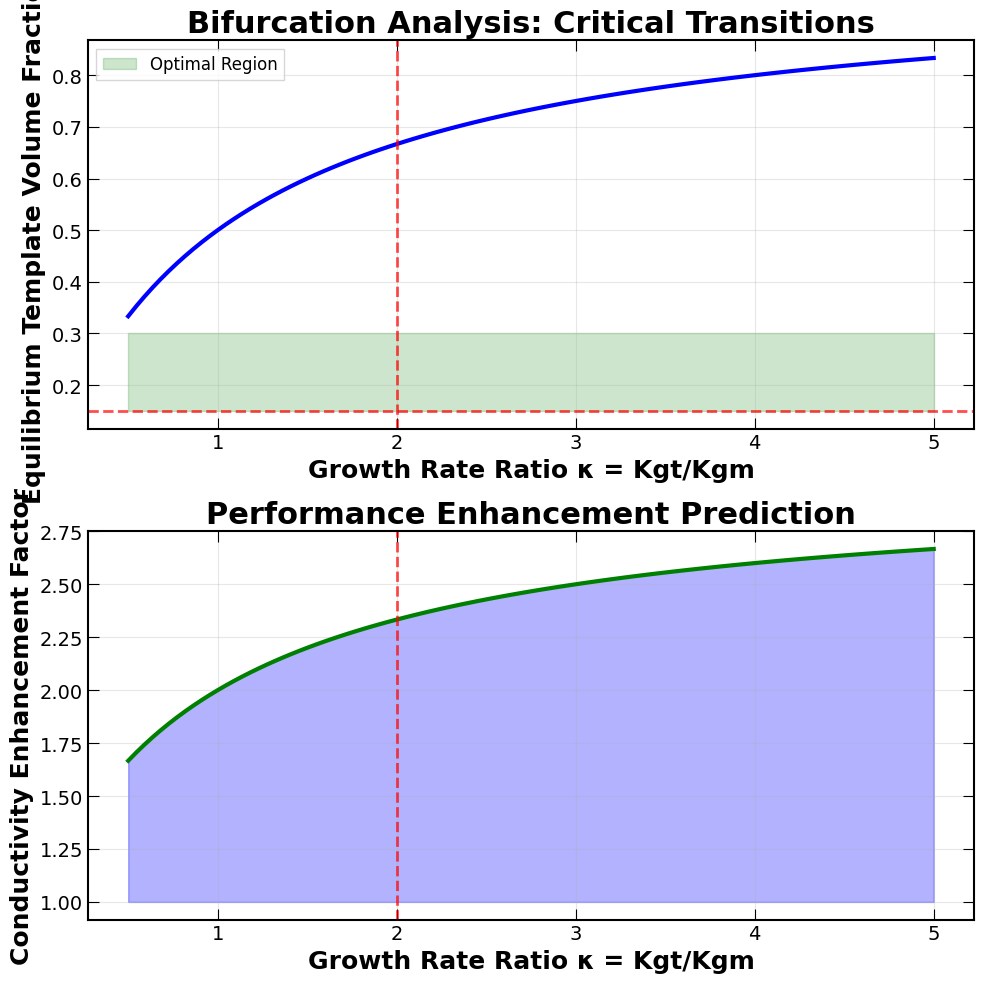

In [ ]:
# Generate the bifurcation diagram
fig = plot_bifurcation_diagram()

# Save it to a file (PNG, PDF, or any supported format)
fig.savefig("bifurcation_diagram.png", dpi=300, bbox_inches='tight')

# Optionally, show the plot
plt.show()


In [ ]:
fig_phase = plot_phase_portrait()
fig_phase.savefig('phase_portrait.png', dpi=300, bbox_inches='tight')
plt.close(fig_phase)  # Close the figure to free memory


In [ ]:
fig_cond = plot_conductivity_surface()
fig_cond.savefig('conductivity_surface.png', dpi=300, bbox_inches='tight')
plt.close(fig_cond)


In [ ]:
fig_sens = plot_sensitivity_analysis()
fig_sens.savefig('sensitivity_analysis.png', dpi=300, bbox_inches='tight')
plt.close(fig_sens)
